Why using weather data?

The main goal of using weather data was to see whether there is any correlation between different weather conditions and bus data, and if yes, than what kind of. The source of the data was NOAA, in particular NOAA weather station in Central Park, New York. Our original hypnosis stated that bad weather condition would have a positive correlation with number of passengers on the bus. In other words, busses would not come on time and our calculated time delta would be bigger, what results in higher crowdedness of the bus.

Cleaning the data: The original data contained empty cells as well as string characters mixed with numbers. Since dropping all na values would result in inconsistent time value periods, it was decided to substitute those ‘bad’ rows with such values that would not influence further analysis (ex: 0 for precipitation or 15 for visibility).

Merging weather and bus data resulted in combined data set that allowed us to create scatter plots that demonstrated correlation between our variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime, math
import statsmodels.api as sm
from scipy import stats

In [2]:
df2 = pd.read_csv('/Users/angelika/Desktop/cs59970/Merged_Bus_Weather.csv')

From our previous data analysis we know that there is no 
buses betwwen 12 and 5. Since passengers arrivals has a linear distributuin 
we will get unrelistically big crowd waiting for the bus till 5 am.
In order to remove that data from our scatter plot let's use loc function

In [3]:
df2 = df2.loc[df2.numPassengersPerBus < 70]

Text(0,0.5,'Number of Passengers per Bus')

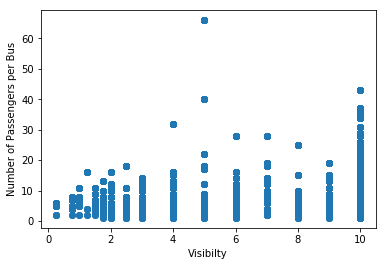

In [4]:
xi = df2.HOURLYVISIBILITY    
y=df2.numPassengersPerBus
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
plt.plot(xi,y,'o')
plt.xlabel("Visibilty")
plt.ylabel("Number of Passengers per Bus")

Text(0,0.5,'Number of Passengers per Bus')

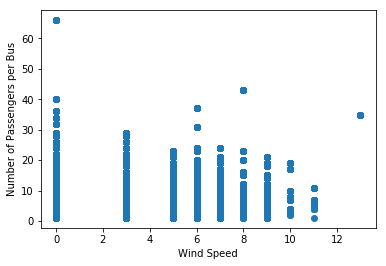

In [5]:
xi = df2.HOURLYWindSpeed 
y=df2.numPassengersPerBus
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
plt.plot(xi,y,'o')
#plt.scatter(df.HOURLYPrecip ,df.numPassengersPerBus)
plt.xlabel("Wind Speed")
plt.ylabel("Number of Passengers per Bus")

Text(0,0.5,'Number of Passengers per Bus')

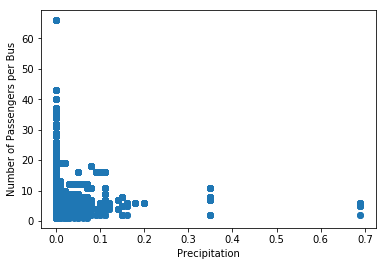

In [6]:
xi = df2.HOURLYPrecip
y=df2.numPassengersPerBus
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
line = slope*xi+intercept
plt.plot(xi,y,'o')
#plt.scatter(df.HOURLYPrecip ,df.numPassengersPerBus)
plt.xlabel("Precipitation")
plt.ylabel("Number of Passengers per Bus")

Analysis of scatter plots: Our scatter plots roughly demonstrated that the days with the most crowding have 0 precipitation. In addition, lower wind speed tends to mean more passengers. Finally, higher visibility generally means a higher number of passengers on the bus.

How strong is the correlation between independent (precipitation, wind speed, and visibility) and dependent variables (crowdedness)?

In order to answer this question, we performed OLS regression analysis.

In [7]:
df2 = sm.add_constant(df2)

est = sm.OLS(df2['numPassengersPerBus'], 
             df2[['HOURLYWindSpeed','HOURLYVISIBILITY']]
            ).fit()
print(est.summary())

                             OLS Regression Results                            
Dep. Variable:     numPassengersPerBus   R-squared:                       0.594
Model:                             OLS   Adj. R-squared:                  0.594
Method:                  Least Squares   F-statistic:                     8772.
Date:                 Mon, 10 Dec 2018   Prob (F-statistic):               0.00
Time:                         23:18:07   Log-Likelihood:                -42904.
No. Observations:                11984   AIC:                         8.581e+04
Df Residuals:                    11982   BIC:                         8.583e+04
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
HOURLYWindSpeed      0.0281   

Explanation of OLS: R squared is the proportion of variance (%) in the dependent variable that can be explained by the independent variable. Our R-squared has a value of 0.594 what generally considered to have a moderate effect size. In addition, our p values indicate that there is 0% or 2% probability that that the result would have come up in a random distribution. Finally coefficient values demonstrate that when the independent variables increase by 1, dependent variable also increases. As a result, we can state that our correlation analysis is quite reliable.

Findings:
	We found very interesting and unexpected results that contradict our original hypothesis of positive correlation between bad weather conditions and crowdedness of the bus. It seems like bus comes on time more often during bad weather conditions. The reason for that requires further research. Our assumption is that moderately bad weather stimulates regular drivers to stay at home what has a positive affect on bus arriving time.  
